In [ ]:
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import seaborn as sns

import pandas as pd
import math
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
import os
import matplotlib.pyplot as plt

Read Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir('/content/drive/My Drive/AI_weather')

In [ ]:
weather = pd.read_csv("train.csv")
weather.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Y
0,0,6.8,0.24,0.29,9.5,0.042,56.0,157.0,0.99586,3.11,0.51,10.1,3
1,1,6.2,0.37,0.24,6.1,0.032,19.0,86.0,0.98934,3.04,0.26,13.4,5
2,2,6.0,0.40,0.30,1.6,0.047,30.0,117.0,0.99310,3.17,0.48,10.1,3
3,3,7.1,0.28,0.19,7.8,0.040,48.0,184.0,0.99579,3.16,0.50,9.4,2
4,4,7.0,0.35,0.24,1.9,0.040,21.0,144.0,0.99230,3.35,0.38,11.0,2


In [ ]:
col = weather.columns       # .columns gives columns names in data 
print(col)

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'Y'],
      dtype='object')


In [ ]:
answer_Y=weather.Y
drop_list = ['Unnamed: 0','Y']
X = weather.drop(drop_list,axis = 1 )
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
0,6.8,0.24,0.29,9.5,0.042,56.0,157.0,0.99586,3.11,0.51,10.1
1,6.2,0.37,0.24,6.1,0.032,19.0,86.0,0.98934,3.04,0.26,13.4
2,6.0,0.40,0.30,1.6,0.047,30.0,117.0,0.99310,3.17,0.48,10.1
3,7.1,0.28,0.19,7.8,0.040,48.0,184.0,0.99579,3.16,0.50,9.4
4,7.0,0.35,0.24,1.9,0.040,21.0,144.0,0.99230,3.35,0.38,11.0


3    1651
2    1096
4     652
5     135
1     120
Name: Y, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


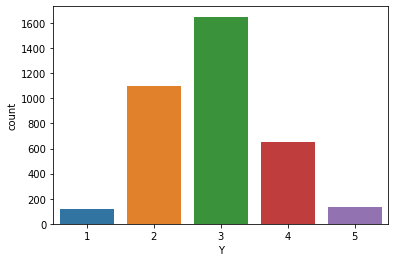

In [ ]:
ax = sns.countplot(answer_Y,label="Count")
print(answer_Y.value_counts())
l1, l2, l3, l4, l5 = answer_Y.value_counts()

Balance the data

In [ ]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.6/dist-packages (0.7.0)


In [ ]:
X.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
count,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000
mean,6.857635,0.277552,0.335298,6.319978,0.045768,35.213875,137.935140,0.993995,3.189450,0.487890,10.524459
std,0.840594,0.102041,0.121766,5.076004,0.022166,16.452680,42.164981,0.003015,0.150104,0.113918,1.231922
min,3.900000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987220,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,107.000000,0.991700,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.100000,0.043000,34.000000,134.000000,0.993700,3.180000,0.470000,10.400000
75%,7.300000,0.320000,0.390000,9.775000,0.050000,45.000000,167.000000,0.996040,3.280000,0.540000,11.400000
max,10.700000,1.100000,1.660000,65.800000,0.346000,131.000000,344.000000,1.038980,3.810000,1.060000,14.200000


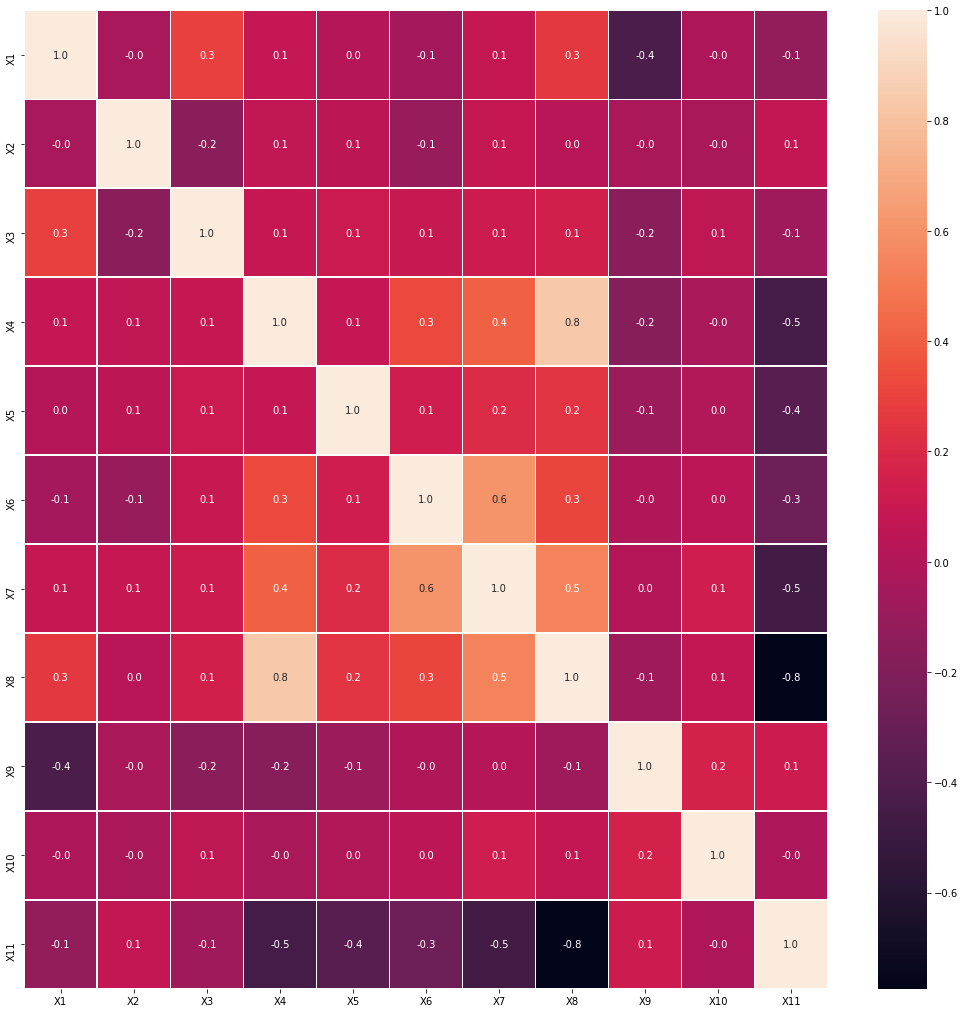

In [ ]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [ ]:
drop_list1 = ['X4']

X_1 = X.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later 
X_1.head()

,X1,X2,X3,X5,X6,X7,X8,X9,X10,X11
0,6.8,0.24,0.29,0.042,56.0,157.0,0.99586,3.11,0.51,10.1
1,6.2,0.37,0.24,0.032,19.0,86.0,0.98934,3.04,0.26,13.4
2,6.0,0.40,0.30,0.047,30.0,117.0,0.99310,3.17,0.48,10.1
3,7.1,0.28,0.19,0.040,48.0,184.0,0.99579,3.16,0.50,9.4
4,7.0,0.35,0.24,0.040,21.0,144.0,0.99230,3.35,0.38,11.0


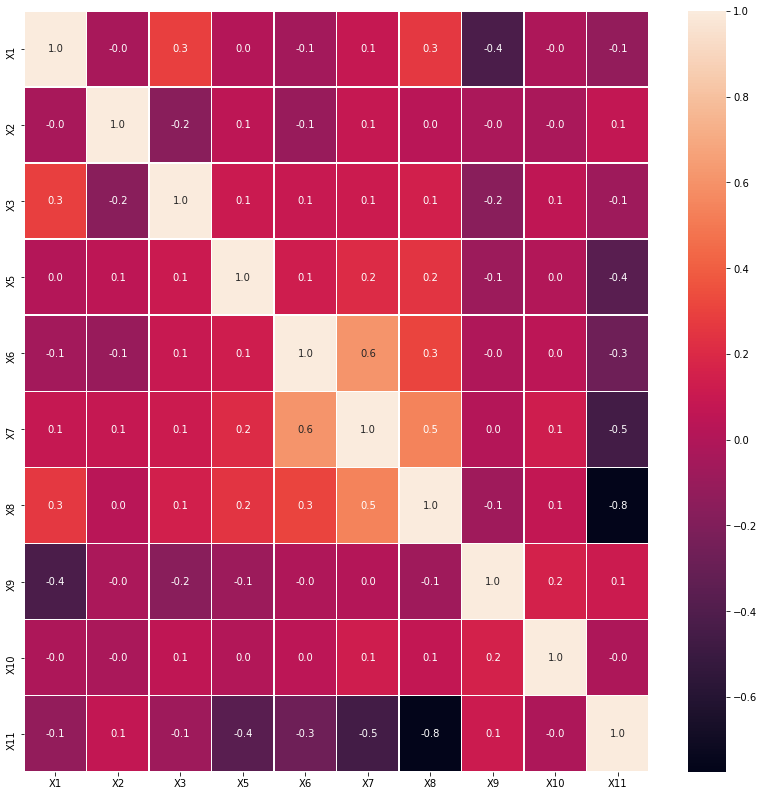

In [ ]:
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(X_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Normorlization



In [ ]:
dataset = weather.values
X = dataset[:,1:12].astype(float)
normorlized_X_1 = preprocessing.MinMaxScaler().fit_transform(X_1)
normorlized_X_1 = (X_1 - X_1.mean()) / (X_1.std())      # standardization x only
normorlized_data = pd.concat([normorlized_X_1.iloc[:,0:],answer_Y],axis=1)  # combine x and y
print(normorlized_data.shape)
print(normorlized_data)

(3654, 11)
            X1        X2        X3        X5  ...        X9       X10       X11  Y
0    -0.068565 -0.368010 -0.372011 -0.170012  ... -0.529299  0.194087 -0.344550  3
1    -0.782346  0.905991 -0.782635 -0.621153  ... -0.995642 -2.000476  2.334191  5
2    -1.020273  1.199991 -0.289887  0.055559  ... -0.129576 -0.069260 -0.344550  3
3     0.288325  0.023990 -1.193259 -0.260240  ... -0.196197  0.106305 -0.912768  2
4     0.169362  0.709990 -0.782635 -0.260240  ...  1.069592 -0.947085  0.386015  2
...        ...       ...       ...       ...  ...       ...       ...       ... ..
3649 -0.068565  0.121990  1.352609  0.326244  ... -0.662540 -0.332608 -0.912768  2
3650 -1.139237  0.415990 -0.618386  0.506701  ...  0.336767 -1.122650  0.142494  2
3651  0.050398 -0.858010 -0.125637 -0.170012  ...  1.402694 -0.859303 -0.019854  3
3652 -0.187529  1.395991  0.449236 -0.260240  ...  0.803110  0.808565 -0.669246  2
3653 -1.020273  0.121990  0.613486  0.100674  ... -0.662540  0.896347  0.358

Build the model

In [ ]:
def predict_model():
  model = Sequential()
  model.add(Dense(256, input_dim=10, activation='relu'))
  for i in range(3):
    model.add(Dense(128, activation='relu'))
  for i in range(2):
    model.add(Dense(64, activation='relu'))
  model.add(Dense(5, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model

In [ ]:
model = predict_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 256)               2816      
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_16 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_17 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_20 (Dense)             (None, 5)                

Data split

```
# 此內容會顯示為程式碼
```



In [ ]:
Fold_number = 10

In [ ]:
kf = KFold(n_splits=Fold_number)
kf.get_n_splits(normorlized_X_1)
print(kf)

In [ ]:
for train_index, test_index in kf.split(normorlized_X_1):
    print("TRAIN:", train_index, "\n\nTEST:", test_index, '\n\n')

In [ ]:
train_data = normorlized_data[0:3000]
test_data = normorlized_data[3000:]
X_train = train_data.drop('Y',axis=1)
Y_train = train_data['Y']
Y_train = pd.get_dummies(train_data['Y'],sparse=True)
X_test = test_data.drop('Y',axis=1)
Y_test = test_data['Y']
Y_test = pd.get_dummies(test_data['Y'],sparse=True)


In [ ]:
print(X_train.shape)
print(Y_train.shape)

(3000, 10)
(3000, 5)


In [ ]:
scores = []
i = 0
for train_index, test_index in kf.split(X):
  i+=1
  X_train, X_test = normorlized_X_1[train_index], normorlized_X_1[test_index]
  Y_train, Y_test = answer_Y[train_index], answer_Y[test_index]

model = predict_model()
model.fit(X_train,Y_train,epochs=100,batch_size=10,validation_split=0.1,verbose=2)
score_train = model.evaluate(X_train,Y_train,verbose=0) 
score_test = model.evaluate(X_test,Y_test,verbose=0) 
print("train:{:0.2f},".format\
          (score_train[1]),"test:{:0.2f}".format(score_test[1]))
scores.append(score_test[1])

Epoch 1/100
270/270 - 1s - loss: 1.1639 - accuracy: 0.5122 - val_loss: 1.1719 - val_accuracy: 0.4900
Epoch 2/100
270/270 - 0s - loss: 1.0651 - accuracy: 0.5459 - val_loss: 1.0672 - val_accuracy: 0.5133
Epoch 3/100
270/270 - 0s - loss: 1.0267 - accuracy: 0.5526 - val_loss: 1.0709 - val_accuracy: 0.4800
Epoch 4/100
270/270 - 0s - loss: 0.9998 - accuracy: 0.5670 - val_loss: 1.0046 - val_accuracy: 0.5267
Epoch 5/100
270/270 - 0s - loss: 0.9796 - accuracy: 0.5878 - val_loss: 1.0319 - val_accuracy: 0.5333
Epoch 6/100
270/270 - 0s - loss: 0.9617 - accuracy: 0.5859 - val_loss: 1.0447 - val_accuracy: 0.5167
Epoch 7/100
270/270 - 0s - loss: 0.9420 - accuracy: 0.5904 - val_loss: 0.9955 - val_accuracy: 0.5367
Epoch 8/100
270/270 - 0s - loss: 0.9152 - accuracy: 0.6004 - val_loss: 1.0187 - val_accuracy: 0.5767
Epoch 9/100
270/270 - 0s - loss: 0.8882 - accuracy: 0.6163 - val_loss: 1.0693 - val_accuracy: 0.5367
Epoch 10/100
270/270 - 0s - loss: 0.8743 - accuracy: 0.6281 - val_loss: 0.9995 - val_accura

In [ ]:
print("Cross Validation with {:d}".format(Fold_number),\
      "folds.\nCV score = {:0.3f} +/- {:0.3f}".\
      format(np.mean(np.array(scores)),\
             np.std(np.array(scores))))

Build KNN model

In [ ]:
X_train, X_test = normorlized_X_1[train_index], normorlized_X_1[test_index]
Y_train, Y_test = answer_Y[train_index], answer_Y[test_index]
clf=KNeighborsClassifier(n_neighbors=10,p=2,weights='distance',algorithm='brute')
clf.fit(X_train,Y_train)

KNN Prediction

In [ ]:
clf.predict(X_test)
print("Training score:",clf.score(X_train,Y_train))
print("Testing score:",clf.score(X_test,Y_test))

Output

In [ ]:
clf.fit(normorlized_X ,answer_Y)
test_data = pd.read_csv("test.csv")
test_dataset = test_data.values
test_data_X = test_dataset[:,1:12].astype(float)
normorlized_test_data_X = preprocessing.MinMaxScaler().fit_transform(test_data_X)
Y_predict = clf.predict(normorlized_test_data_X)

In [ ]:
predict_sample = pd.read_csv("sample_submission.csv", index_col=0)
predict_sample['Y'] = Y_predict
predict_sample.to_csv("predict_1.csv")

XGBoost

In [ ]:
i = 0
# for train_index, test_index in kf.split(normorlized_X_1):
#   i+=1
eval_set = [(X_test, Y_test)]
  # X_train, X_test = normorlized_X_1[train_index], normorlized_X_1[test_index]
  # Y_train, Y_test = answer_Y[train_index], answer_Y[test_index]
xgbc = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
      colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
      max_depth=10, min_child_weight=1, missing=None, n_estimators=2000,
      n_jobs=1, nthread=None, objective='binary:logistic', random_state=40,
      reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
      silent=True, subsample=1)
xgbc.fit(X_train, Y_train, early_stopping_rounds=300,eval_metric=["merror","mlogloss"],eval_set=eval_set, verbose=True)
print("train_score",xgbc.score(X_train, Y_train),"test_score",xgbc.score(X_test, Y_test))


GridSearch

In [ ]:
param_test1 = { 'max_depth':list(range(3,10,1)),
          'min_child_weight':list(range(1,6,2)),
          'learning_rate':list(range(0.01,0.5,0.02)),
          'n_estimators':list(range(100,2000,100))
              }
GridSearchCV(estimator= XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
      colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
      max_depth=10, min_child_weight=1, missing=None, n_estimators=2000,
      n_jobs=1, nthread=None, objective='binary:logistic', random_state=40,
      reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
      silent=True, subsample=1),
             param_grid = param_test1, scoring='roc_auc', iid=False, cv=5)
gsearch1.fit(X,y)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score


clf_rf = RandomForestClassifier(n_estimators=1000, random_state=43)
scores = []
i = 0
# for train_index, test_index in kf.split(normorlized_X_1):
#   i+=1
#   X_train, X_test = normorlized_X_1[train_index], normorlized_X_1[test_index]
#   Y_train, Y_test = answer_Y[train_index], answer_Y[test_index]

  #random forest classifier with n_estimators=10 (default)
clr_rf = clf_rf.fit(X_train,Y_train)

ac = accuracy_score(Y_test,clf_rf.predict(X_test))
print('Accuracy is: ',ac)
scores.append(ac)
cm = confusion_matrix(Y_test,clf_rf.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
print(scores)
avg_score = sum(scores)/len(scores)
print(avg_score)

Output

Preprocessing test data

In [ ]:
test_data = pd.read_csv("test.csv")
test_data.head()

In [ ]:
drop_list2 = ['Unnamed: 0','X4']
test_data_X = test_data.drop(drop_list2,axis = 1 )
test_data_X.head()

In [ ]:
normorlized_test_data_X = preprocessing.MinMaxScaler().fit_transform(test_data_X)

normorlized_test_data_X

In [ ]:
xgbc.fit(normorlized_X_1 ,answer_Y)
Y_predict = xgbc.predict(normorlized_test_data_X)

In [ ]:
predict_sample = pd.read_csv("sample_submission.csv", index_col=0)
predict_sample['Y'] = Y_predict
predict_sample.to_csv("predict_4.csv")